In [2]:
#Here we will be predicting the quality of wine 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



In [3]:
wine = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\ML project\Project_5\winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


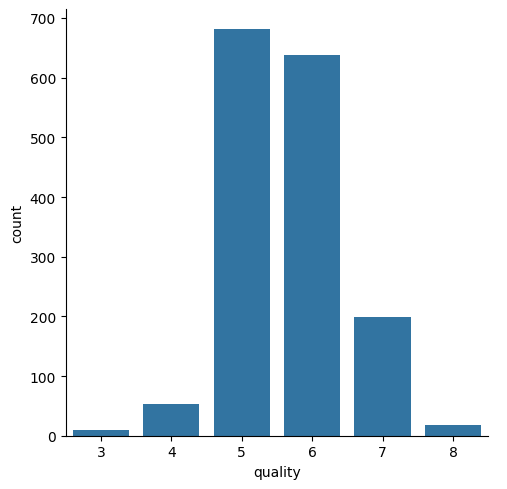

In [7]:
sns.catplot(x='quality', data= wine, kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

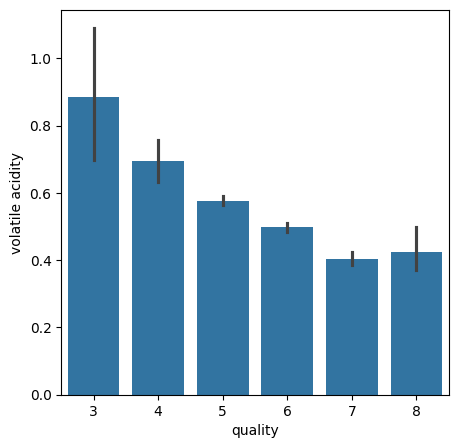

In [9]:
#data visualization 
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine)

In [14]:
correlation = wine.corr()

<Axes: >

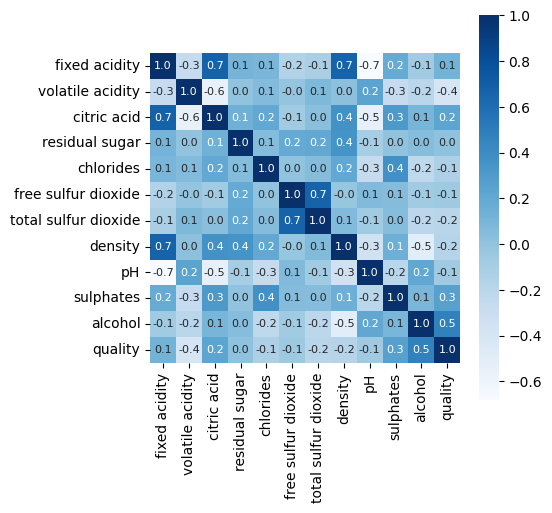

In [15]:
#correlation
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,annot=True,square=True,fmt ='.1f',annot_kws={'size':8},cmap='Blues')

In [16]:
#separting the data and label
X = wine.drop(columns='quality',axis=1)
Y = wine['quality'].apply( lambda y_value:1 if y_value>=7 else 0)

In [17]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [18]:
Y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [24]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
train_pred=model.predict(X_train)

In [28]:

test_pred=model.predict(X_test)
Acc2 = accuracy_score(test_pred,Y_test)
print(str(Acc2))

0.928125
